## Feature Analysis and calculating Feature importance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import os
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("../input/ddos-data/out.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15139493 entries, 0 to 15139492
Data columns (total 48 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Dst Port           float64
 2   Protocol           float64
 3   Flow Duration      float64
 4   Tot Fwd Pkts       float64
 5   Tot Bwd Pkts       float64
 6   TotLen Fwd Pkts    float64
 7   Fwd Pkt Len Max    float64
 8   Fwd Pkt Len Min    float64
 9   Fwd Pkt Len Mean   float64
 10  Bwd Pkt Len Max    float64
 11  Bwd Pkt Len Min    float64
 12  Bwd Pkt Len Mean   float64
 13  Flow Byts/s        float64
 14  Flow Pkts/s        float64
 15  Flow IAT Mean      float64
 16  Flow IAT Std       float64
 17  Flow IAT Max       float64
 18  Flow IAT Min       float64
 19  Bwd IAT Tot        float64
 20  Bwd IAT Mean       float64
 21  Bwd IAT Std        float64
 22  Bwd IAT Max        float64
 23  Bwd IAT Min        float64
 24  Fwd PSH Flags      float64
 25  Fwd URG Flags   

In [5]:
for column in df:
 if df[column].dtype == 'float64':
    df[column]=pd.to_numeric(df[column], downcast='float')
 if df[column].dtype == 'int64':
    df[column]=pd.to_numeric(df[column], downcast='integer')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15139493 entries, 0 to 15139492
Data columns (total 48 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int32  
 1   Dst Port           float32
 2   Protocol           float32
 3   Flow Duration      float32
 4   Tot Fwd Pkts       float32
 5   Tot Bwd Pkts       float32
 6   TotLen Fwd Pkts    float32
 7   Fwd Pkt Len Max    float32
 8   Fwd Pkt Len Min    float32
 9   Fwd Pkt Len Mean   float32
 10  Bwd Pkt Len Max    float32
 11  Bwd Pkt Len Min    float32
 12  Bwd Pkt Len Mean   float32
 13  Flow Byts/s        float32
 14  Flow Pkts/s        float32
 15  Flow IAT Mean      float32
 16  Flow IAT Std       float32
 17  Flow IAT Max       float32
 18  Flow IAT Min       float32
 19  Bwd IAT Tot        float32
 20  Bwd IAT Mean       float32
 21  Bwd IAT Std        float32
 22  Bwd IAT Max        float32
 23  Bwd IAT Min        float32
 24  Fwd PSH Flags      float32
 25  Fwd URG Flags   

In [7]:
def plot_info(colName,frame=df, kind='barh'):
    
    ddos = frame[frame['Label']==1][colName].value_counts().nlargest(10)
    print('\033[1m'+'\'' +colName+'\''+' count for DDoS:'+'\033[0m')
    print(ddos,'\n')
    ddos.plot(kind=kind,color='orange')
    plt.show()
    
    benign = frame[frame['Label']==0][colName].value_counts().nlargest(10)
    print('\033[1m'+'\'' +colName+'\''+' count for Benign:'+'\033[0m')
    print(benign,'\n')
    benign.plot(kind=kind)
    plt.show()
    
    return

'Dst Port' count for DDoS:
80.0      1674598
21.0       312700
8080.0     264272
22.0       176845
53.0        47162
443.0       27494
3389.0      12790
445.0        5152
135.0        2423
0.0          2356
Name: Dst Port, dtype: int64 



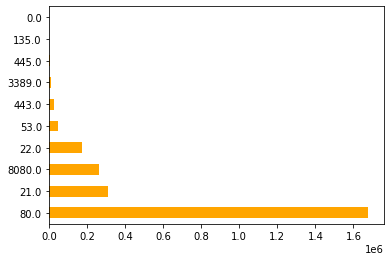

'Dst Port' count for Benign:
53.0      3772375
443.0     1872975
3389.0    1708708
80.0      1586405
445.0      662314
0.0        221130
5355.0      47565
3128.0      26338
137.0       21277
67.0        12587
Name: Dst Port, dtype: int64 



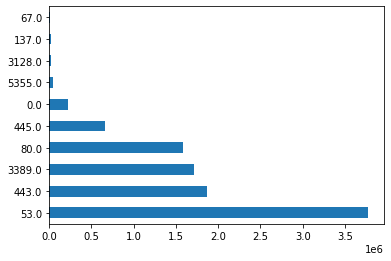

In [8]:
plot_info('Dst Port')

## Observation
    http port 80 is most used for ddos as it is the default http port
    traffic on port 53 is secured as it is DNS Bypass Firewall Rules so the traffic on will be genuine 

'Protocol' count for DDoS:
6.0     2524102
17.0      50629
0.0        2356
Name: Protocol, dtype: int64 



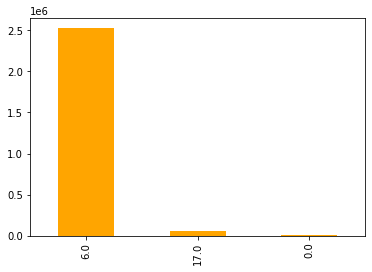

'Protocol' count for Benign:
6.0     8457274
17.0    3884024
0.0      221108
Name: Protocol, dtype: int64 



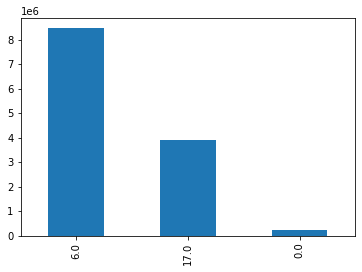

In [9]:
plot_info('Protocol',kind='bar')

#### Observation:
Protocol 6 (TCP: Transfer Control Protocol) and 17 (UDP: User Datagram Protocol) is used for DDoS attacks.

Protocol 0 is IPv6 Hop-by-Hop Option Protocol which is the least used protocol among all.

In [10]:
train_X = df.drop(columns='Label',axis=1)
train_Y = df['Label']

In [11]:
# scaler = MinMaxScaler()
# # transform data
# scaled = scaler.fit_transform(train_X)
# print(scaled)

[[0.00000000e+00 8.08728161e-04 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.60524144e-08 1.22072175e-03 3.52941176e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.32104829e-07 1.22072175e-03 3.52941176e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99999868e-01 8.14404517e-01 3.52941176e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99999934e-01 8.08728161e-04 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.22072175e-03 3.52941176e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [11]:
train_X.columns

Index(['Unnamed: 0', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'Down/Up Ratio', 'Fwd Seg Size Avg',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Min'],
      dtype='object')

In [12]:
for i in train_X.columns:
    minimum = train_X[i].min()
    maximum = train_X[i].max()
    train_X[i] = (train_X[i] - minimum)/(maximum - minimum)

In [13]:
train_X.head()

,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Down/Up Ratio,Fwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Min
0,0.000000e+00,0.000809,1.000000,0.000019,0.000000,0.000008,3.393544e-07,0.000760,0.033562,0.002964,...,0.003215,0.002964,0.000000,0.000000,0.142857,0.0,0.0,0.0,0.0,0.0
1,6.605241e-08,0.001221,0.352941,0.048215,0.000006,0.000008,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.125015,0.125015,0.357143,0.0,0.0,0.0,0.0,0.0
2,1.321048e-07,0.001221,0.352941,0.000113,0.000006,0.000032,1.987647e-06,0.004454,0.000000,0.005788,...,0.003215,0.005788,1.000000,0.003357,0.357143,0.0,0.0,0.0,0.0,0.0
3,1.981572e-07,0.001221,0.352941,0.000013,0.000006,0.000032,2.133085e-06,0.004780,0.000000,0.006211,...,0.003215,0.006211,1.000000,0.003357,0.357143,0.0,0.0,0.0,0.0,0.0
4,2.642097e-07,0.000809,1.000000,0.000009,0.000000,0.000008,2.493216e-07,0.000559,0.024658,0.002178,...,0.003215,0.002178,0.000000,0.000000,0.142857,0.0,0.0,0.0,0.0,0.0


In [14]:
train_X = train_X.drop(columns='Unnamed: 0')

In [15]:
train_X.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Bwd Pkt Len Max,...,Down/Up Ratio,Fwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Min
0,0.000809,1.000000,0.000019,0.000000,0.000008,3.393544e-07,0.000760,0.033562,0.002964,0.002517,...,0.003215,0.002964,0.000000,0.000000,0.142857,0.0,0.0,0.0,0.0,0.0
1,0.001221,0.352941,0.048215,0.000006,0.000008,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.125015,0.125015,0.357143,0.0,0.0,0.0,0.0,0.0
2,0.001221,0.352941,0.000113,0.000006,0.000032,1.987647e-06,0.004454,0.000000,0.005788,0.014349,...,0.003215,0.005788,1.000000,0.003357,0.357143,0.0,0.0,0.0,0.0,0.0
3,0.001221,0.352941,0.000013,0.000006,0.000032,2.133085e-06,0.004780,0.000000,0.006211,0.014349,...,0.003215,0.006211,1.000000,0.003357,0.357143,0.0,0.0,0.0,0.0,0.0
4,0.000809,1.000000,0.000009,0.000000,0.000008,2.493216e-07,0.000559,0.024658,0.002178,0.001120,...,0.003215,0.002178,0.000000,0.000000,0.142857,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [17]:
sel = SelectFromModel(RandomForestClassifier(n_jobs=-1,n_estimators=50,max_depth=5,verbose=1))
sel.fit(train_X, train_Y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.8min finished


SelectFromModel(estimator=RandomForestClassifier(max_depth=5, n_estimators=50,
                                                 n_jobs=-1, verbose=1))

In [18]:
print('Number of important features')
selected_feat = train_X.columns[(sel.get_support())]
len(selected_feat)

Number of important features


17

In [19]:
for name, importance in zip(train_X.columns, sel.estimator_.feature_importances_):
    print(name, "=", importance)

Dst Port = 0.11386986067078114
Protocol = 0.006956421661715217
Flow Duration = 0.034916594365630015
Tot Fwd Pkts = 0.040579835727089765
Tot Bwd Pkts = 0.023426992118509477
TotLen Fwd Pkts = 0.0015079356909827532
Fwd Pkt Len Max = 0.0663406722656925
Fwd Pkt Len Min = 0.005557770732982832
Fwd Pkt Len Mean = 0.06337364411154807
Bwd Pkt Len Max = 0.02957867242630879
Bwd Pkt Len Min = 0.003924675911492719
Bwd Pkt Len Mean = 0.01979202977722151
Flow Byts/s = 0.0021824491616321768
Flow Pkts/s = 0.04018560477260937
Flow IAT Mean = 0.019640363505451928
Flow IAT Std = 0.02120562700553256
Flow IAT Max = 0.029116469273911507
Flow IAT Min = 0.010533096236283152
Bwd IAT Tot = 0.006004575391906045
Bwd IAT Mean = 0.0006009598747196079
Bwd IAT Std = 0.0036361643926749623
Bwd IAT Max = 0.004047003234924597
Bwd IAT Min = 0.00043660073270713275
Fwd PSH Flags = 0.0003112263205893772
Fwd URG Flags = 1.0684061443811717e-05
Fwd Pkts/s = 0.04195505126438875
Bwd Pkts/s = 0.025096412889560108
Pkt Len Min = 0.002

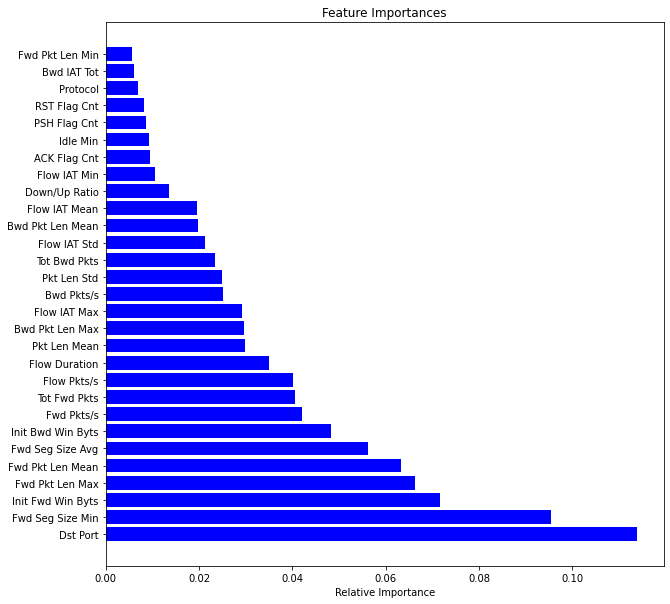

In [20]:
features = train_X.columns.values
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[:-30:-1]
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [21]:
imp_features = features[indices][0:10]
print(len(imp_features))
print(imp_features)
imp_features_plus_y = np.append(imp_features,'Label')

10
['Dst Port' 'Fwd Seg Size Min' 'Init Fwd Win Byts' 'Fwd Pkt Len Max'
 'Fwd Pkt Len Mean' 'Fwd Seg Size Avg' 'Init Bwd Win Byts' 'Fwd Pkts/s'
 'Tot Fwd Pkts' 'Flow Pkts/s']


In [22]:
from sklearn.model_selection import train_test_split

In [34]:
# major, minor = train_test_split(df[imp_features_plus_y],test_size=0.3,stratify=df[['Label']])
# print(minor.shape)
# # y_plot = minor['Label']
# # print(y_plot.shape)

In [23]:
df.drop(columns='Unnamed: 0',inplace=True)

In [24]:
df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Bwd Pkt Len Max,...,Fwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Min,Label
0,53.0,17.0,2291.0,1.0,1.0,49.0,49.0,49.0,49.000000,164.0,...,49.000000,-1.0,-1.0,8.0,0.0,0.0,0.0,0.0,0.0,0
1,80.0,6.0,5785762.0,3.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,8192.0,8192.0,20.0,0.0,0.0,0.0,0.0,0.0,0
2,80.0,6.0,13513.0,3.0,4.0,287.0,287.0,0.0,95.666664,935.0,...,95.666664,65535.0,219.0,20.0,0.0,0.0,0.0,0.0,0.0,1
3,80.0,6.0,1610.0,3.0,4.0,308.0,308.0,0.0,102.666664,935.0,...,102.666664,65535.0,219.0,20.0,0.0,0.0,0.0,0.0,0.0,1
4,53.0,17.0,1115.0,1.0,1.0,36.0,36.0,36.0,36.000000,73.0,...,36.000000,-1.0,-1.0,8.0,0.0,0.0,0.0,0.0,0.0,0


In [25]:
imp_features_plus_y

array(['Dst Port', 'Fwd Seg Size Min', 'Init Fwd Win Byts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Fwd Seg Size Avg',
       'Init Bwd Win Byts', 'Fwd Pkts/s', 'Tot Fwd Pkts', 'Flow Pkts/s',
       'Label'], dtype=object)

In [26]:
major, minor = train_test_split(df[imp_features_plus_y],test_size=0.3,stratify=df[['Label']])
print(minor.shape)

(4541848, 11)


In [27]:
y_plot = minor['Label']
print(y_plot.shape)

(4541848,)


100%|██████████| 10/10 [00:02<00:00,  4.01it/s]


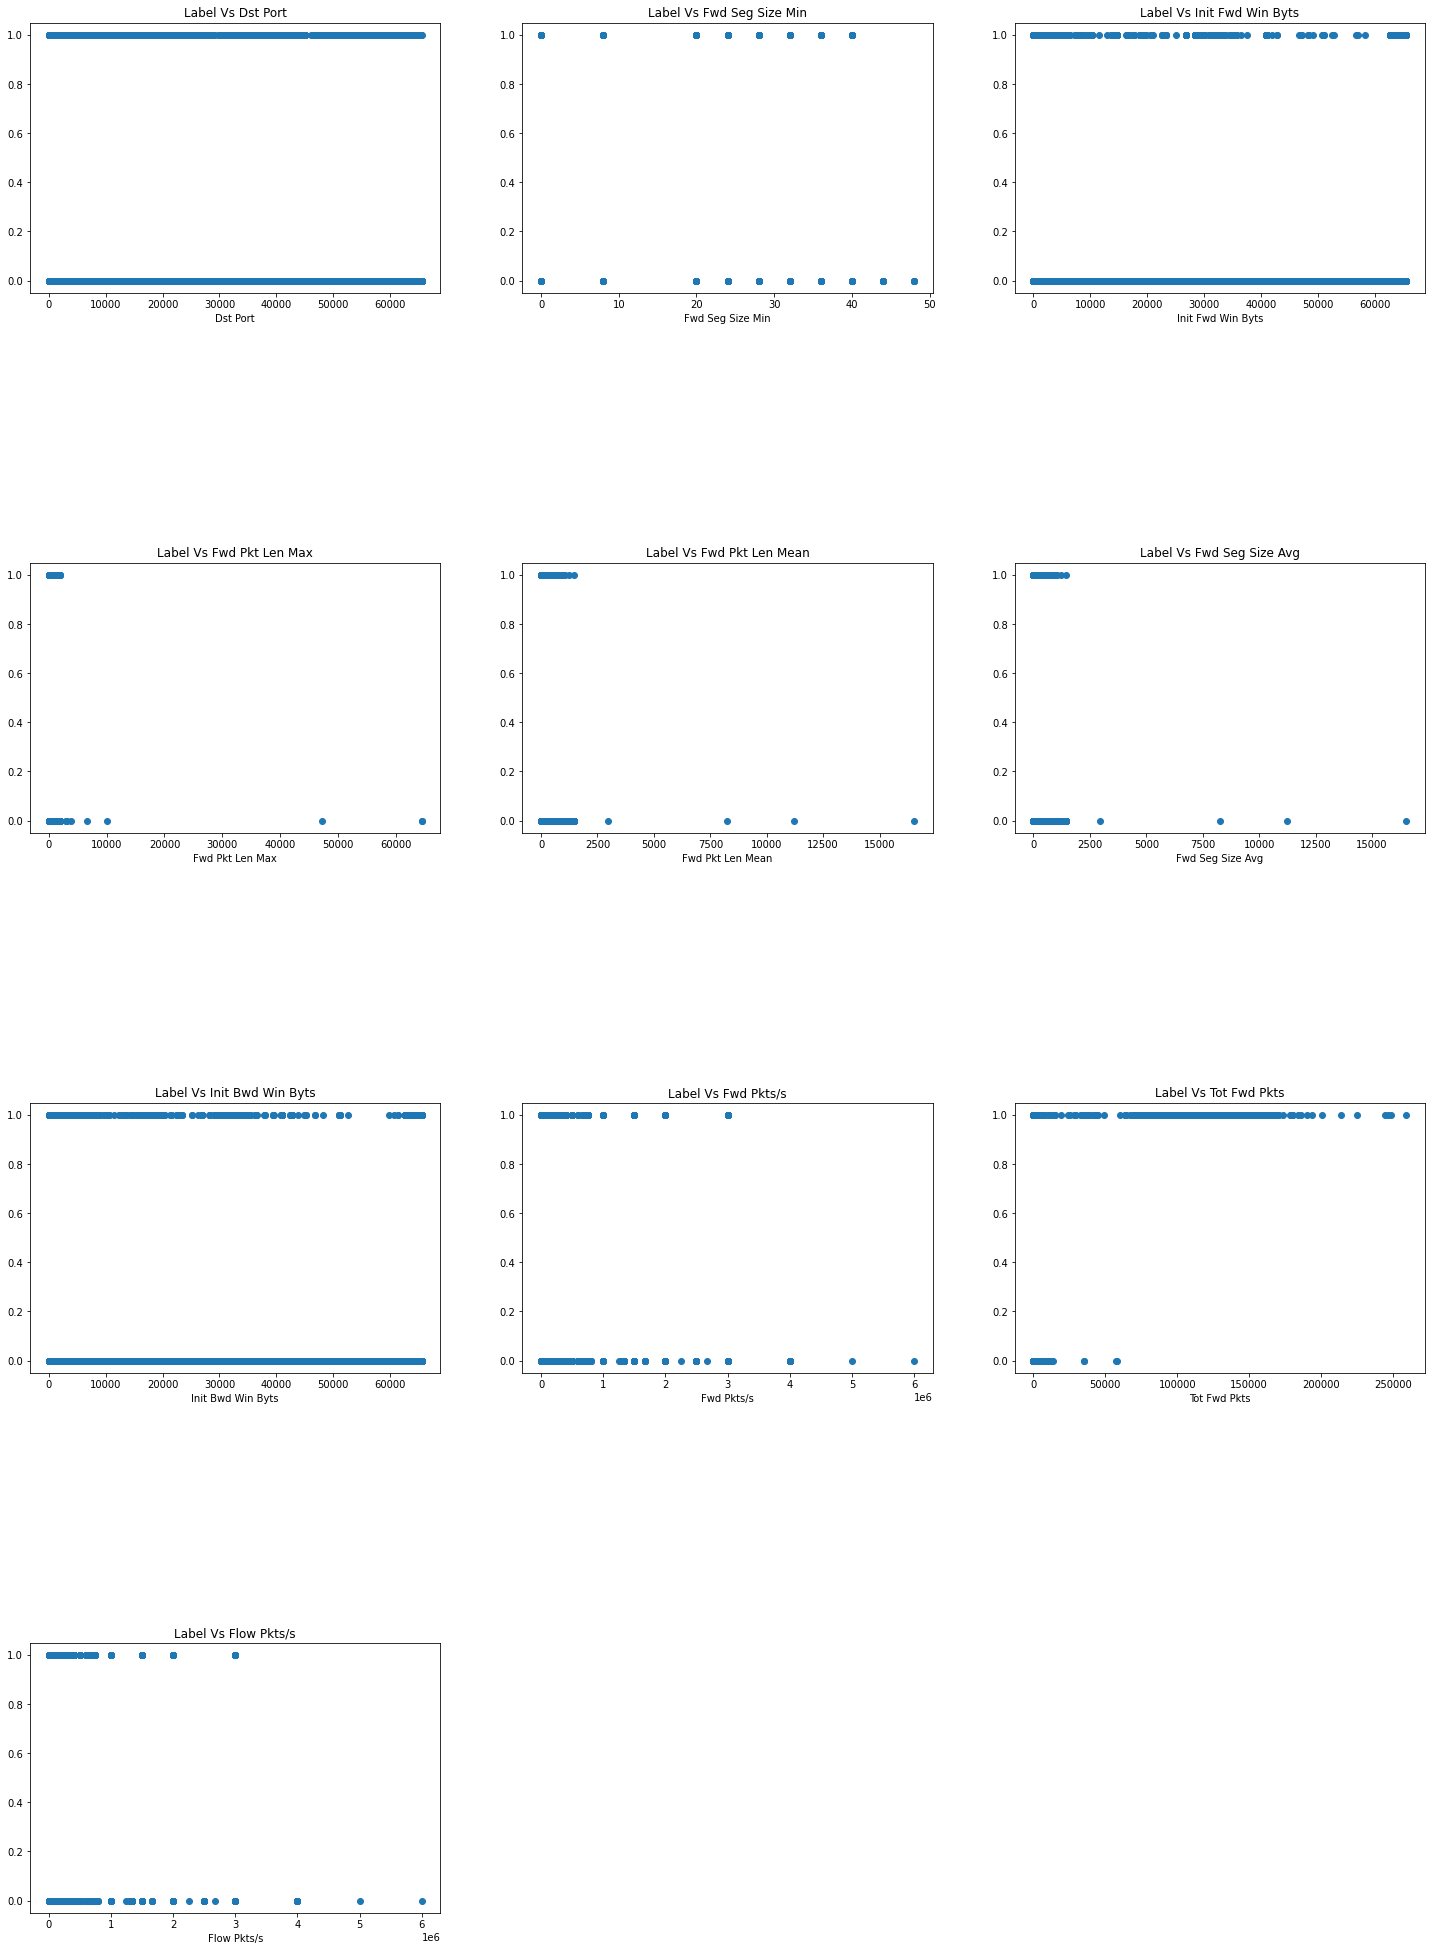

In [28]:
plt.figure(figsize=(25,30))
count = 0
for i in tqdm(imp_features):
    plt.subplot(4,3,count+1)
    plt.subplots_adjust( top=1, wspace=0.2, hspace=1)
    plt.scatter(minor[i],y_plot)
    plt.xlabel(i)
    plt.title('Label Vs '+i)
    count = count+1
plt.show()

100%|██████████| 10/10 [00:06<00:00,  1.66it/s]


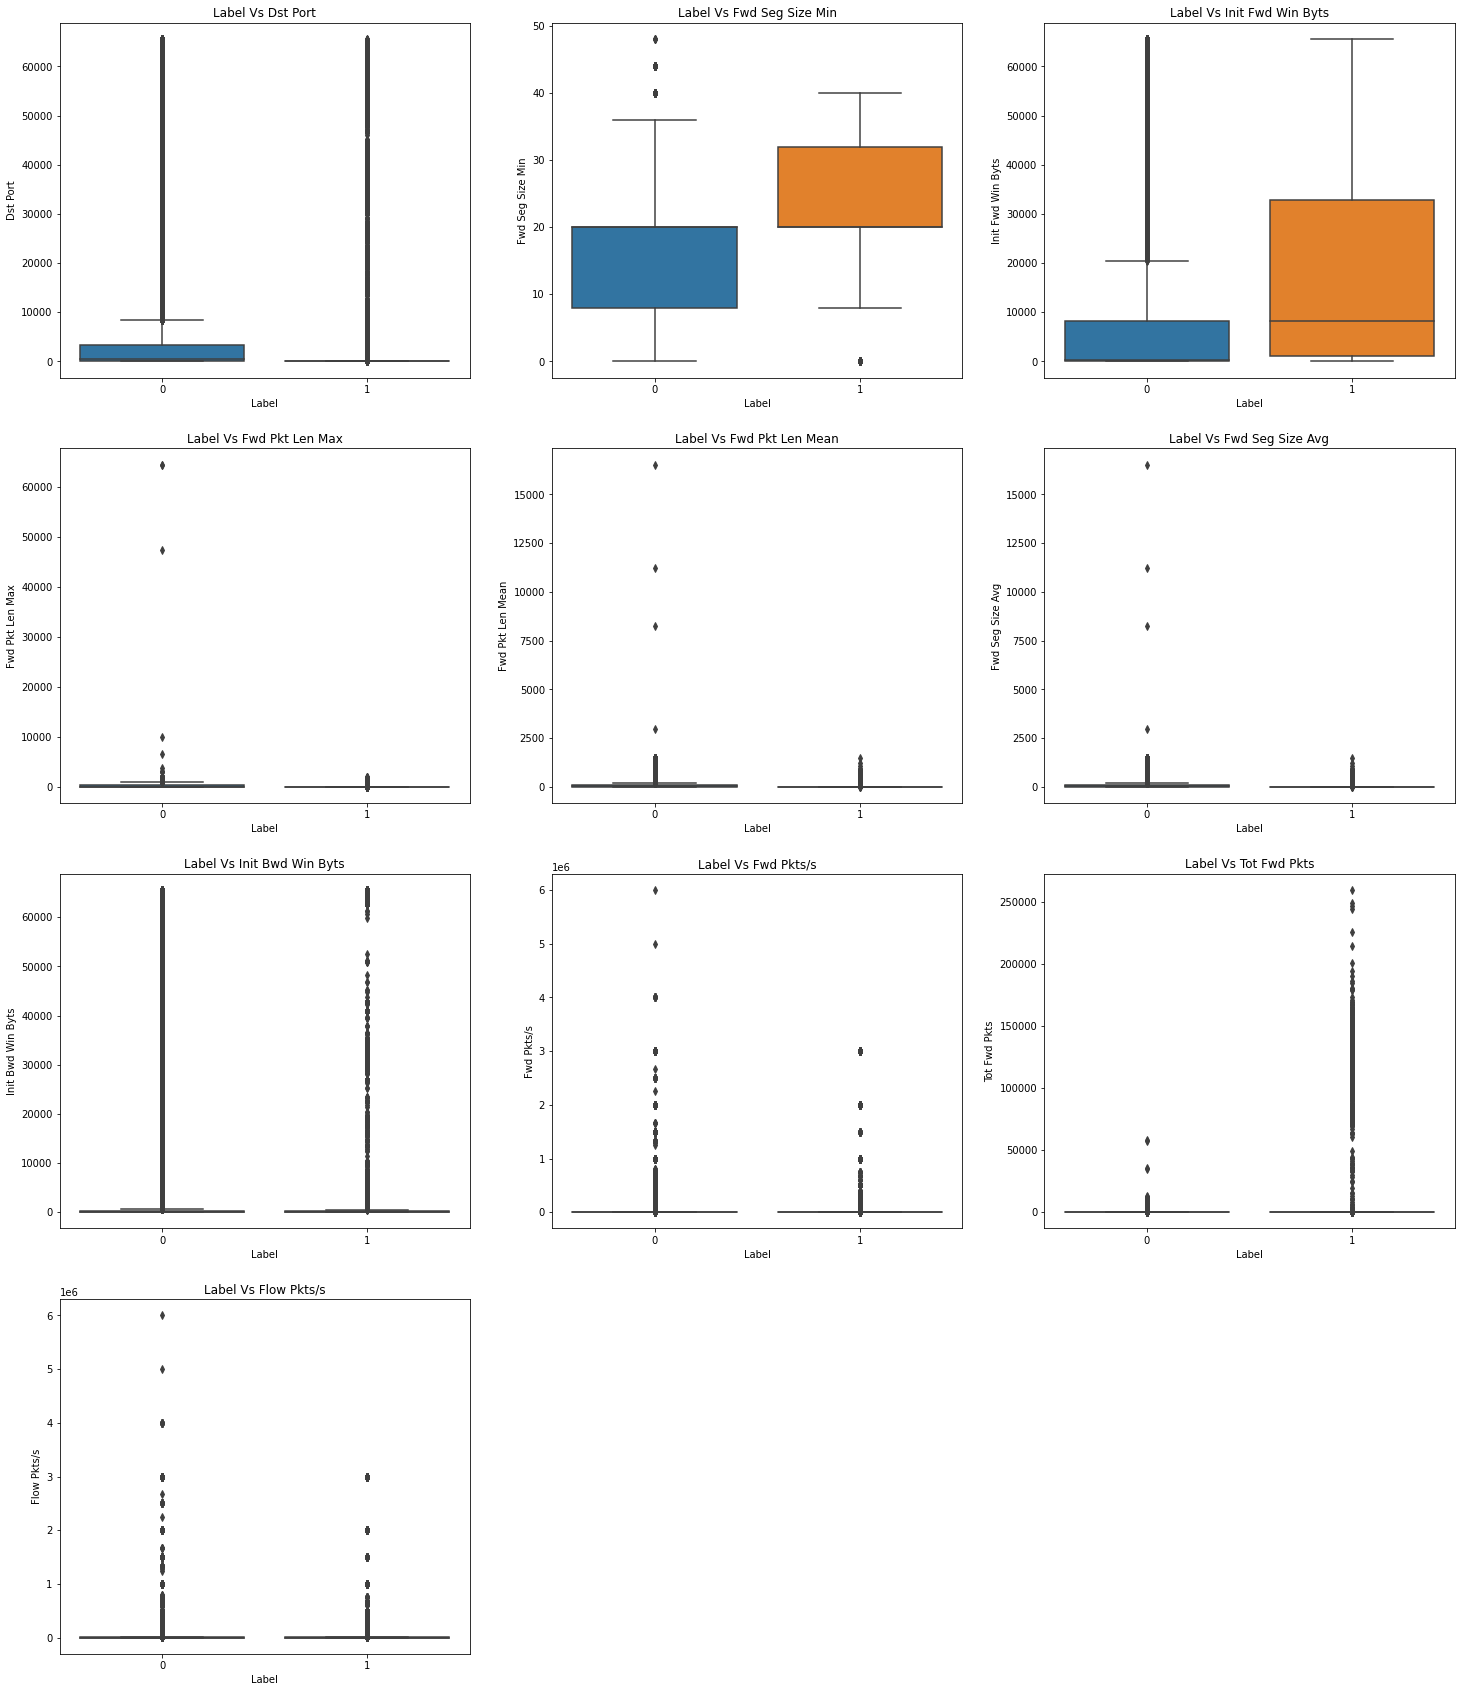

In [30]:
plt.figure(figsize=(25,30))
count = 0
for i in tqdm(imp_features):
    plt.subplot(4,3,count+1)
    sns.boxplot(x='Label', y=i, data=minor)
    plt.title('Label Vs '+i)
    count = count+1
plt.show()